In [1]:
%matplotlib inline

import pylab as pl
import enaml
import numpy as np

with enaml.imports():
    from psi.token import primitives
    from psi.controller.calibration import InterpCalibration
    from psi.controller.queue import FIFOSignalQueue
    from psi.controller.queue import InterleavedFIFOSignalQueue
    
calibration = InterpCalibration.as_attenuation()

No PSIEXPERIMENT_BASE environment variable defined.  Defaulting to the user's home directory, /home/bburan/.config/psi.  In the future, it is recommended that you create a base directory where the paradigm settings, calibration data, log files and data files can be stored.  Once this directory is created, create the environment variable, PSIEXPERIMENT_BASE, with the path to the directory as the value.


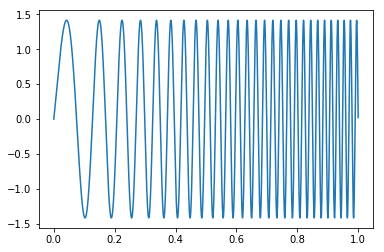

In [2]:
fs = 20000
t = np.arange(fs)/fs
chirp = primitives.ChirpFactory(fs, 5, 50, 1, 0, calibration)
y = chirp.next(fs)
pl.plot(t, y)

In [3]:
noise = primitives.BandlimitedNoiseFactory(fs, 0, 0, 100, 1000, 12, 1, 80, False, calibration)
noise_burst = primitives.Cos2EnvelopeFactory(fs, 0, 0.25, 1, calibration, noise)

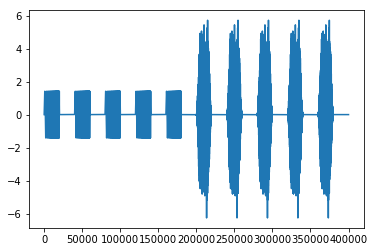

In [4]:
queue = FIFOSignalQueue(initial_delay=0)
queue.set_fs(fs)
queue.set_filter_delay(0)

queue.append(chirp, trials=5, delays=1)
queue.append(noise_burst, trials=5, delays=1)

y, complete = queue.pop_buffer(samples=fs*20)
pl.plot(y)

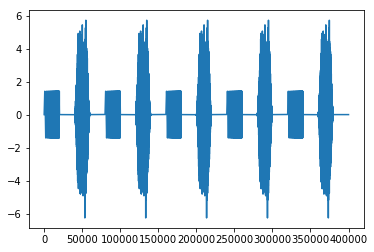

In [5]:
queue = InterleavedFIFOSignalQueue(initial_delay=0)
queue.set_fs(fs)
queue.set_filter_delay(0)

queue.append(chirp, trials=5, delays=1)
queue.append(noise_burst, trials=5, delays=1)

y, complete = queue.pop_buffer(samples=fs*20)
pl.plot(y)